In [23]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
from scipy.io import loadmat, savemat

def db2mag(db): return np.power(10, db/20)

In [2]:
# section for fitting. no need to install
from resonator_tools import circuit
from resonator_tools.circuit import notch_port

In [3]:
global_address = r"C:\Users\mukha\Documents\Python Scripts\Kantele\Kantele_git\Data\Power_sweep\Raw_data" 
sample_folders = os.listdir(global_address)
for i in range(len(sample_folders)):
    if ".PNG" in sample_folders[i]: pass
    else: 
        print(r"[%d]" %(i), '----------->', sample_folders[i]) 

[1] -----------> S11W6
[2] -----------> S18W11
[3] -----------> S5W2.7
[4] -----------> S7W4


<div style="text-align: center; font-size: 45px; color: blue;">
    S5W2.7
</div>

In [4]:
sample = 1
sample_address = global_address+"\\"+sample_folders[sample]
sample_measurements = os.listdir(sample_address)
for i in range(len(sample_measurements)):
    if ".PNG" in sample_measurements[i]: pass
    else: 
        print(r"[%d]" %(i), '----------->', sample_measurements[i]) 

[0] -----------> 20db_room_att
[1] -----------> full_band_reference.mat
[2] -----------> High_power
[3] -----------> High_power_2nd_cooldown


In [31]:
measurement = 3
sample_measurement_address = sample_address+"\\"+sample_measurements[measurement]
sample_measurement_data = os.listdir(sample_measurement_address)
for i in range(len(sample_measurement_data)):
    if ".PNG" in sample_measurement_data[i]: pass
    else: 
        print(r"[%d]" %(i), '----------->', sample_measurement_data[i]) 

[0] -----------> POWER_SCAN_2nd_cooldown_res_0_15-44-33.mat
[1] -----------> POWER_SCAN_2nd_cooldown_res_1_15-47-07.mat
[2] -----------> POWER_SCAN_2nd_cooldown_res_2_15-49-40.mat
[3] -----------> POWER_SCAN_2nd_cooldown_res_3_15-52-13.mat
[4] -----------> POWER_SCAN_2nd_cooldown_res_4_15-54-45.mat
[5] -----------> POWER_SCAN_2nd_cooldown_res_5_15-57-18.mat
[6] -----------> POWER_SCAN_2nd_cooldown_res_6_15-59-50.mat
[7] -----------> POWER_SCAN_2nd_cooldown_res_7_16-02-23.mat
[8] -----------> POWER_SCAN_2nd_cooldown_res_8_16-04-55.mat
[9] -----------> POWER_SCAN_2nd_cooldown_res_9_16-07-28.mat


In [32]:
resonator = 1
file_address = sample_measurement_address+"\\"+sample_measurement_data[resonator]
print(file_address[60:])
mat = loadmat(file_address)
mat.keys()

Data\Power_sweep\Raw_data\S11W6\High_power_2nd_cooldown\POWER_SCAN_2nd_cooldown_res_1_15-47-07.mat


dict_keys(['__header__', '__version__', '__globals__', 'vna', 'freq', 'powers', 'bands', 'avgs', 'temp', 'add_att_inside', 'mags', 'phas'])

In [33]:
powers = mat['powers'][0]
print(powers.shape)
phas = mat['phas']
print(phas.shape)
mags = mat['mags']
print(mags.shape)
freqs = mat['freqs'][0]
print(freqs.shape)

(15,)
(15, 1, 2001)
(15, 1, 2001)


KeyError: 'freqs'

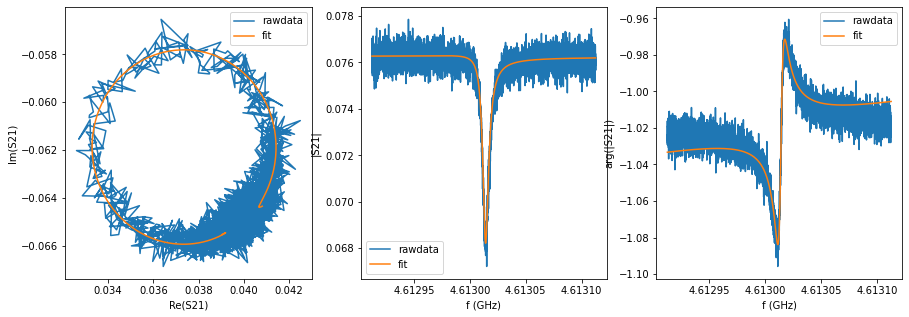

{'Qi_dia_corr': 801838.8667165334,
 'Qi_no_corr': 802920.9379423432,
 'absQc': 6774998.578854432,
 'Qc_dia_corr': 6853033.323544266,
 'Ql': 717847.1876659979,
 'fr': 4613013844.054551,
 'theta0': -2.9905392375204634,
 'phi0': 0.1510534160693298,
 'phi0_err': 0.012232689910574586,
 'Ql_err': 11497.98468287107,
 'absQc_err': 74317.88855137622,
 'fr_err': 53.265341852066854,
 'chi_square': 9.021584620677422e-05,
 'Qi_no_corr_err': 13731.45162366484,
 'Qi_dia_corr_err': 13701.5037121809}

In [25]:
# testing fit
font = {'size': 10}
matplotlib.rc('font', **font)
power_num = 7
S21 = db2mag(mags[power_num])*np.exp(1j*phas[power_num])
port1 = notch_port(freqs, S21)
port1.autofit()
port1.plotall()
port1.fitresults

# Fit all powers for all resonators

Data\Power_sweep\Raw_data\S11W6\High_power\POWER_SCAN_res_8.mat
(26,)
(26, 5001)
(26, 5001)
(5001,)


C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


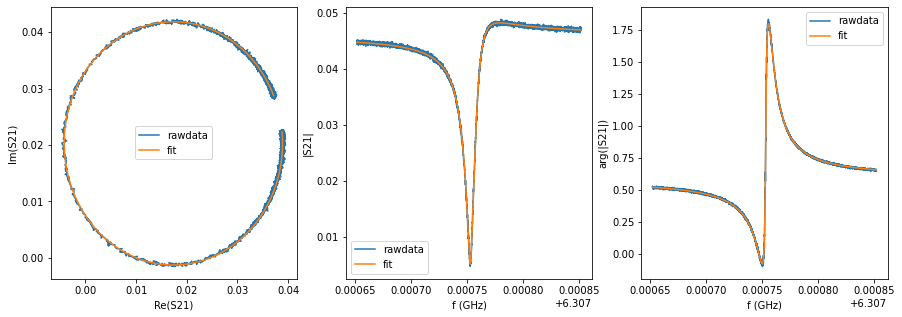

C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


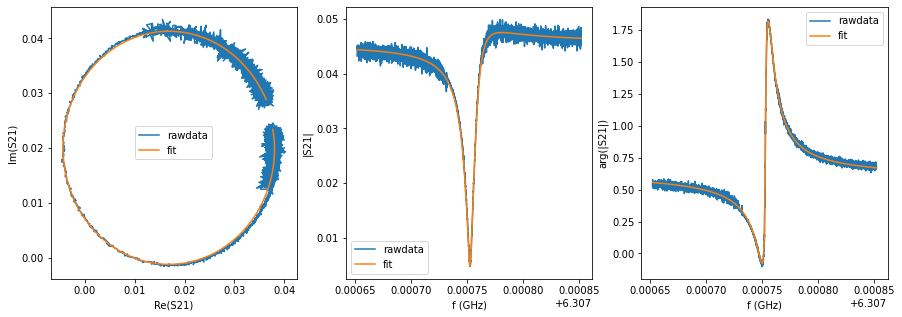

C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


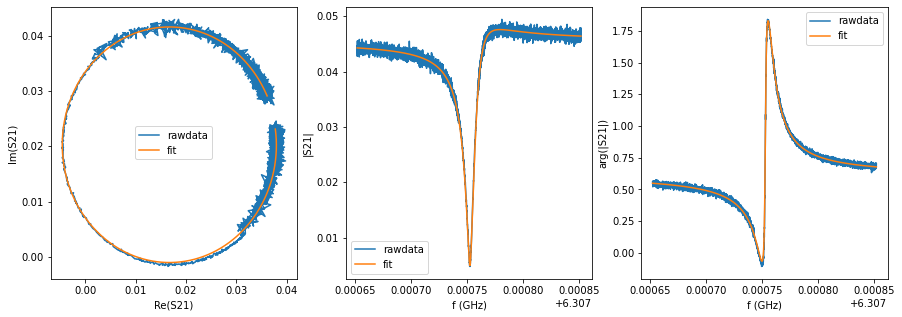

C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


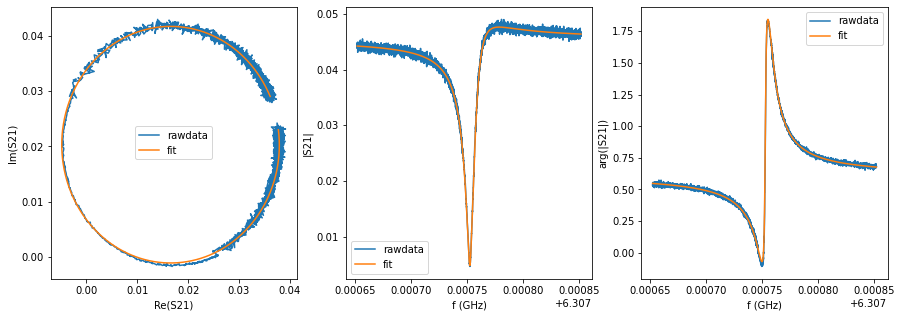

C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


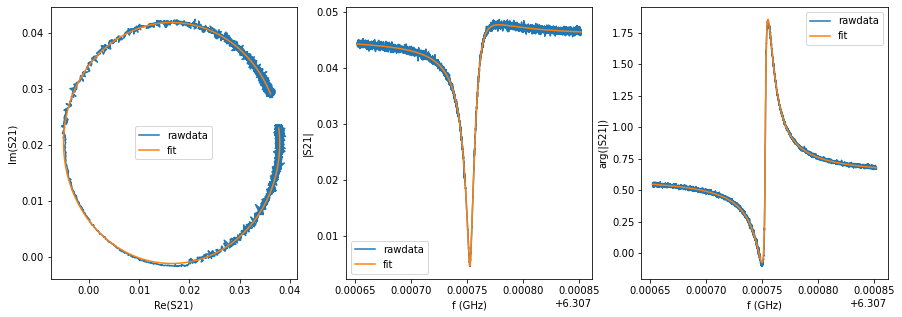

C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


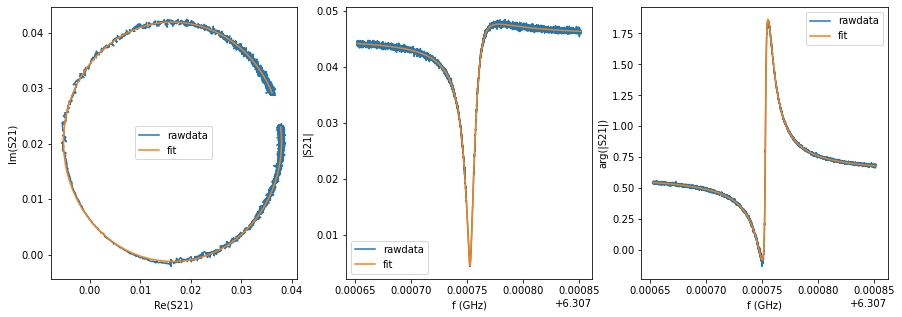

C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


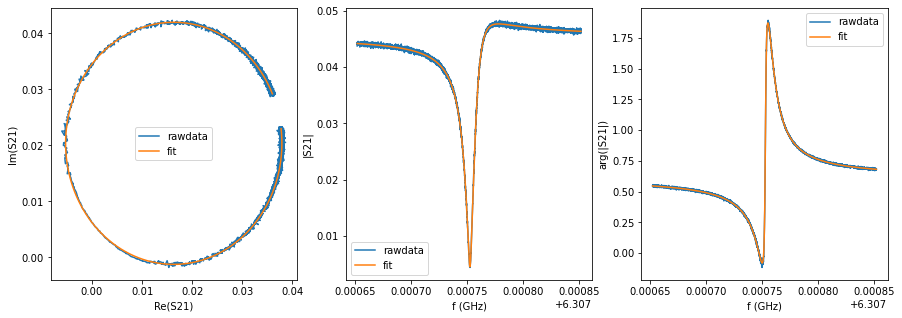

C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


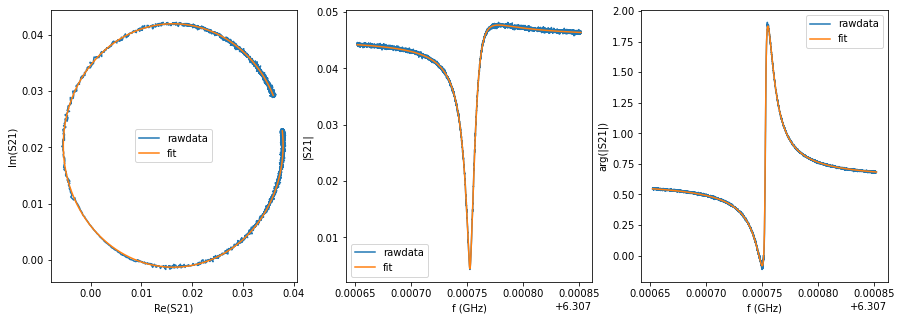

C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


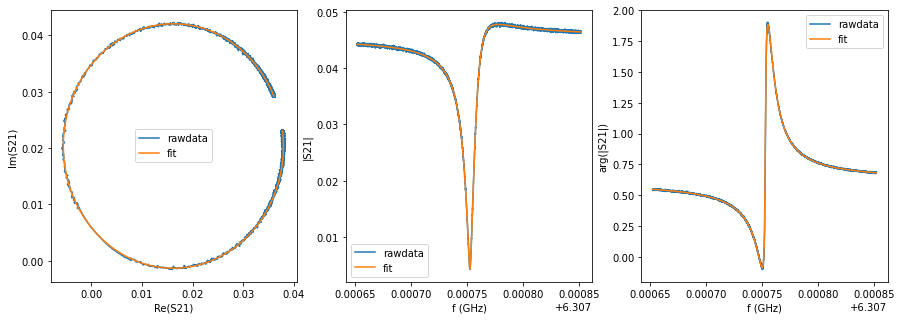

C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


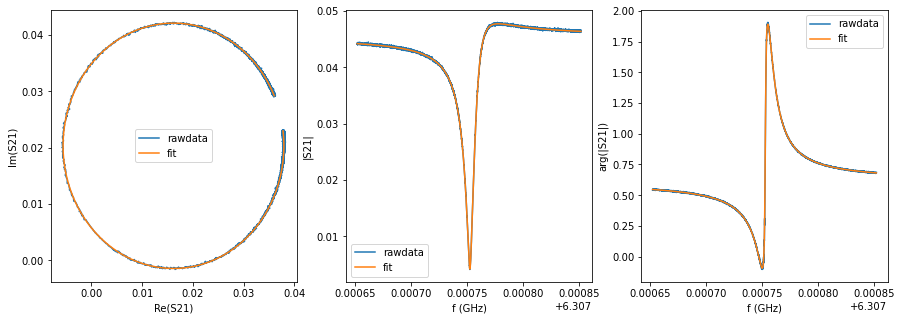

C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


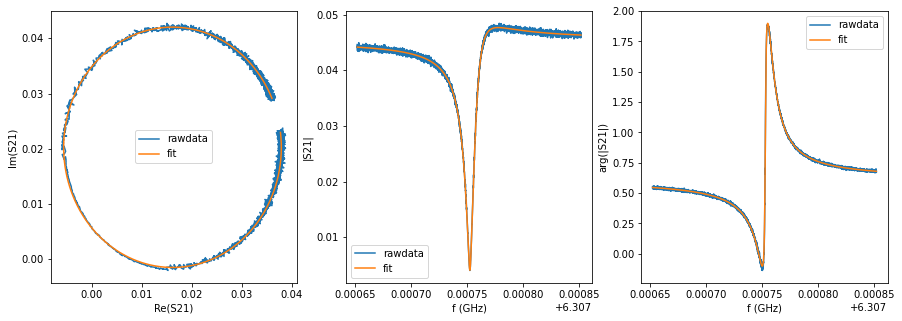

C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


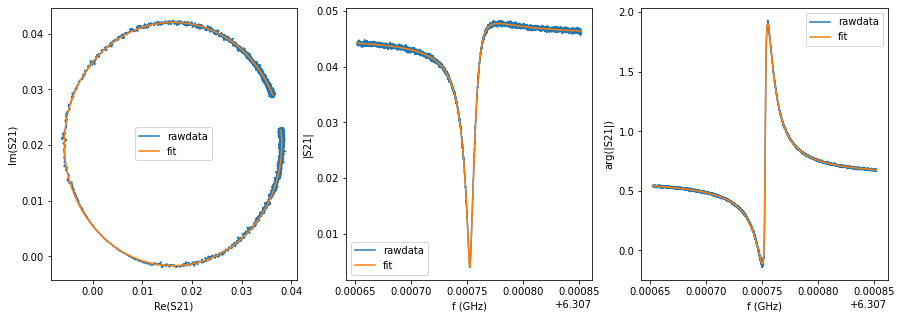

C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


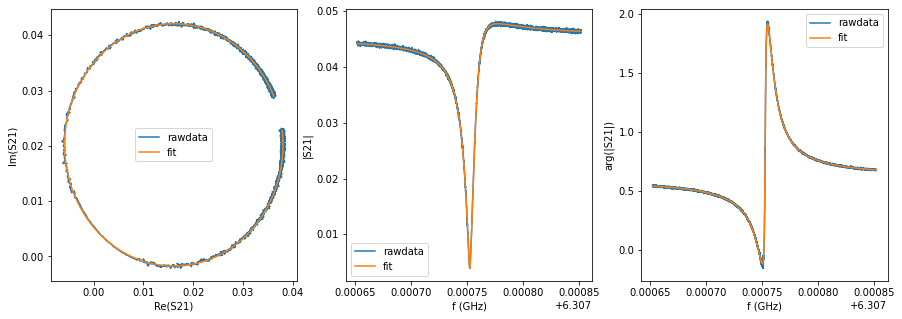

C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


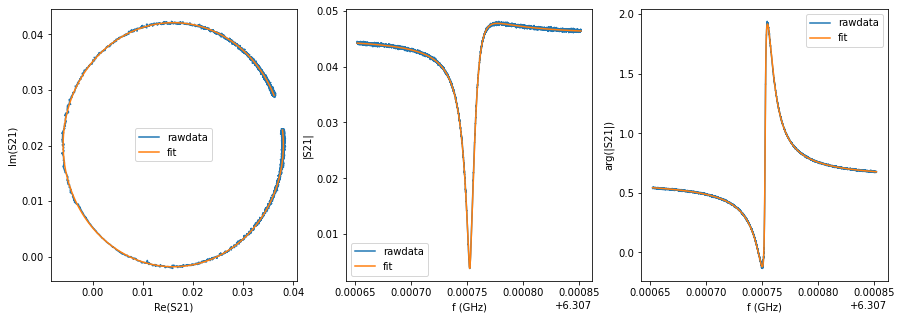

C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


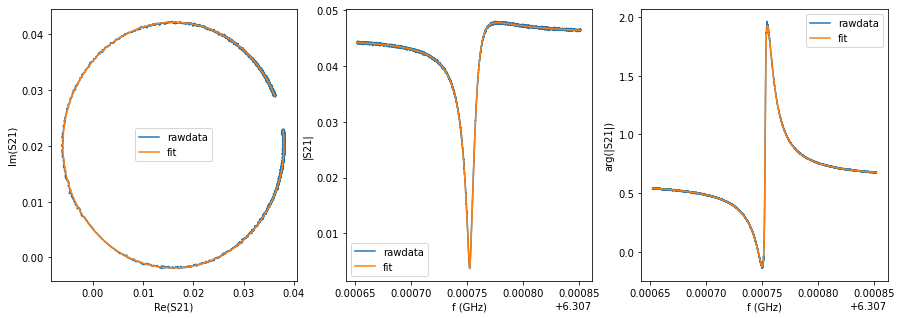

C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


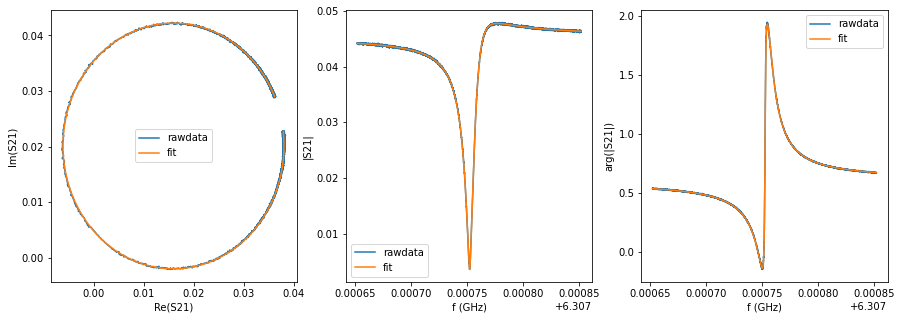

C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


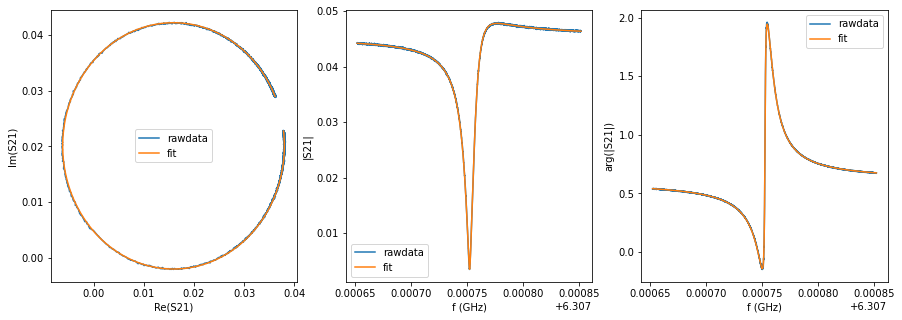

C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


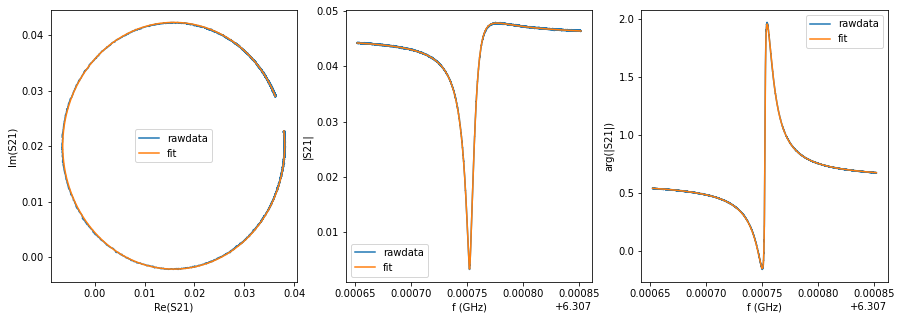

C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


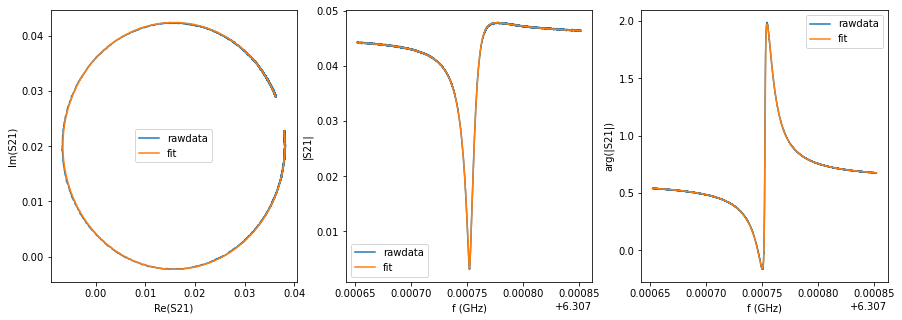

C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


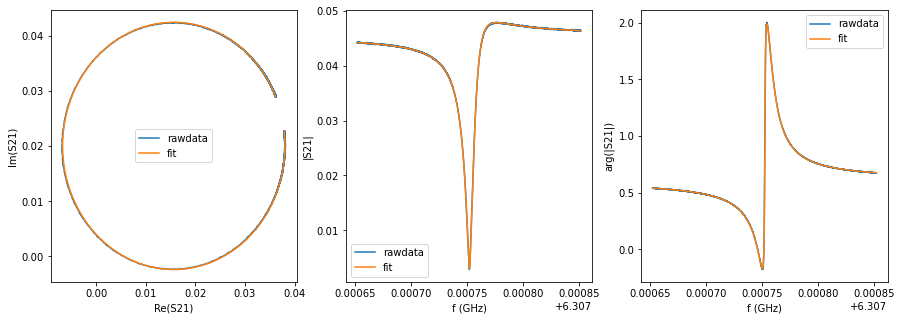

C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


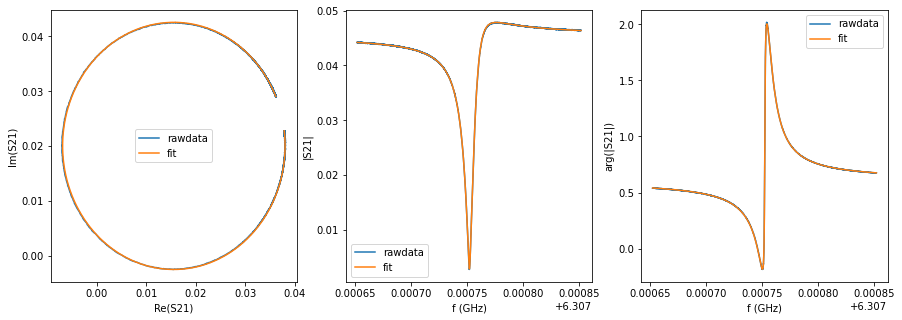

C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


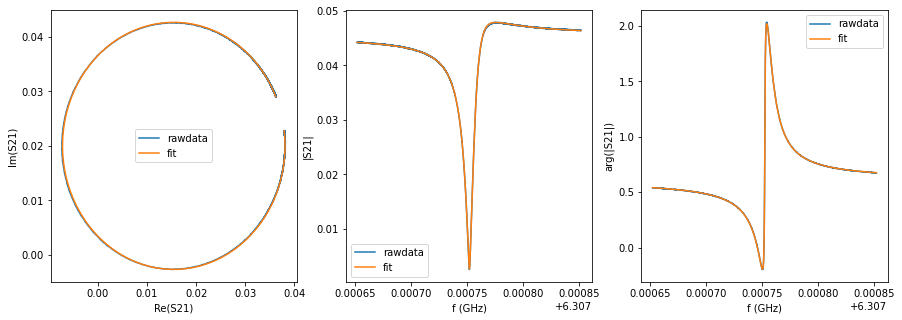

C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


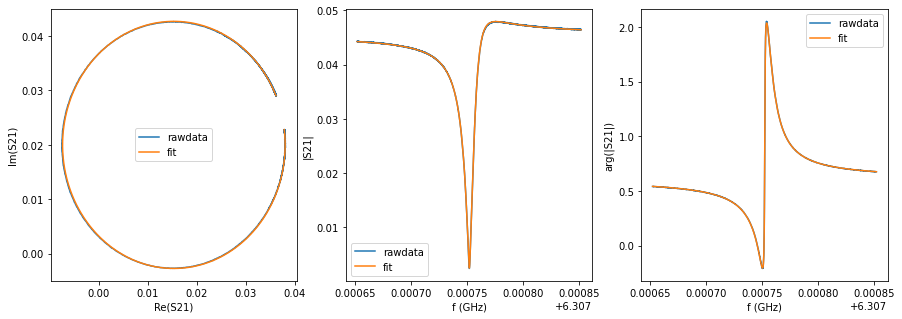

C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


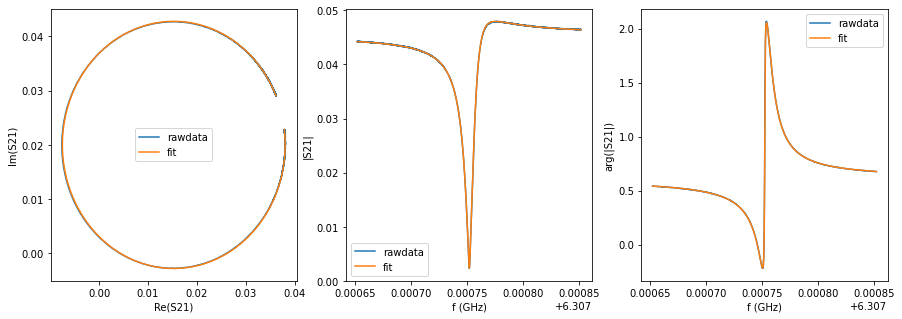

C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


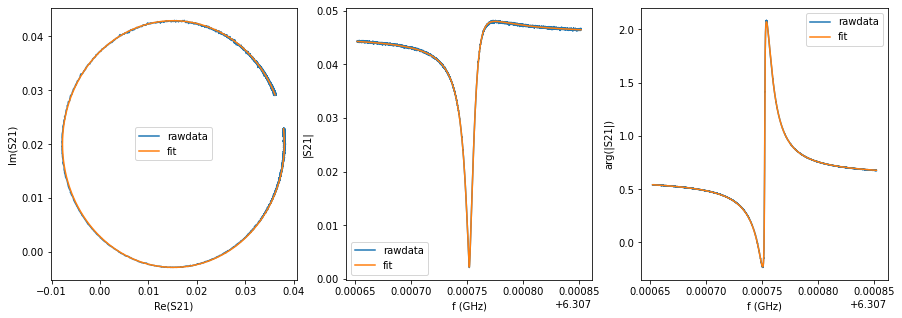

C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


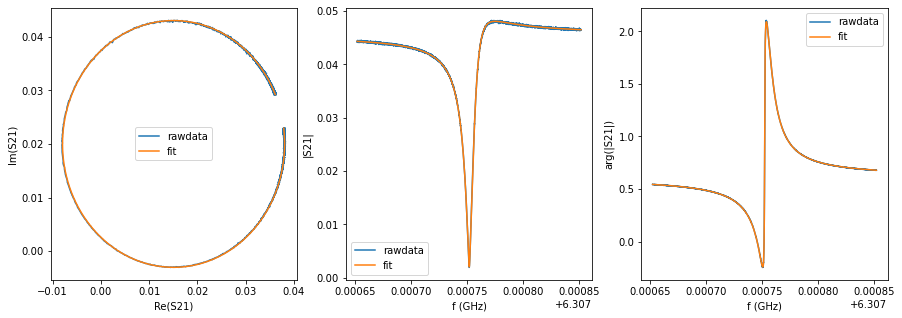

In [30]:
resonator = 8
file_address = sample_measurement_address+"\\"+sample_measurement_data[resonator]
print(file_address[60:])
mat = loadmat(file_address)
powers = mat['powers'][0]
print(powers.shape)
phas = mat['phas']
print(phas.shape)
mags = mat['mags']
print(mags.shape)
freqs = mat['freqs'][0]
print(freqs.shape)


resonanse_freq = np.array([])

for p in range(len(powers)):

    current_power = powers[p]
    S21 = db2mag(mags[p])*np.exp(1j*phas[p])
    port1 = notch_port(freqs, S21)
    port1.autofit()
    port1.plotall()
    resonanse_freq = np.append(resonanse_freq, port1.fitresults['fr'])

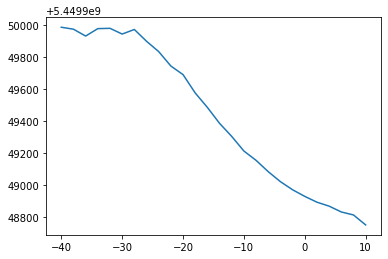

In [29]:
plt.plot(powers, resonanse_freq)